# Working with text

CREDIT: This practical was inspired from [this notebook on NLP](https://www.kaggle.com/code/amar09/text-pre-processing-and-feature-extraction).

## Setup
### Imports

In [1]:
import string

import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
from sklearn.model_selection import train_test_split    # for classification
from sklearn.svm import LinearSVC                       # for classification
from sklearn.metrics import confusion_matrix            # for classification
from sklearn.metrics import accuracy_score              # for classification
import imblearn                                         # for imbalance management
import time                                             # for execution time measurement
import nltk                                             # Natural Language ToolKit for NLP

### Loading the dataset

Today's dataset is the [IMDB Movie Reviews Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

In [2]:
df = pd.read_csv("imdb_dataset.csv")

## Observing the dataset

Using what you have learned in the previous lessons, examine the datasets and see what you can learn about them.
In particular, identify the classification task this dataset was created for, and the potential issues you could encounter.
Are the classes balanced?

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
df.duplicated().value_counts()

False 49582
True 418
dtype: int64

In [22]:
df["sentiment"].value_counts()

positive 25000
negative 25000
Name: sentiment, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

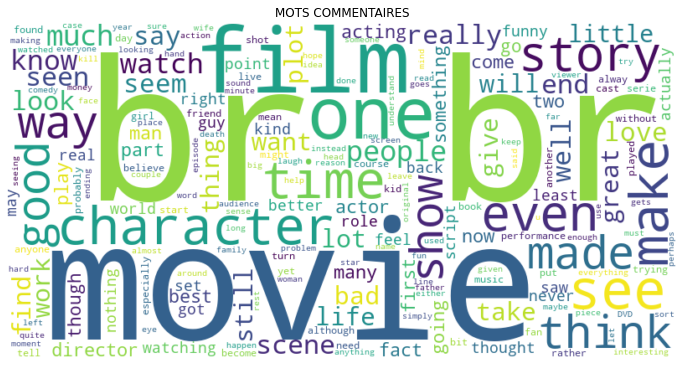

In [21]:
from wordcloud import WordCloud
all_reviews = " ".join(review for review in df["review"])
wordcloud = WordCloud (width = 800, height = 400, background_color = "white").generate(all_reviews)
plt.figure (figsize= (12, 7))
plt.imshow (wordcloud, interpolation = "bilinear")
plt.axis ("off")
plt.title ("MOTS COMMENTAIRES")
plt.show

*[Your comments here]*

### Analysing the reviews

In order to see what needs to be cleaned, let us first observe the most common words in the dataset.

1. Create a function `create_corpus(texts)` that takes a list / pd.Series of strings, and outputs a list of all the individual words contained in it.
*Hint: You may need to use the `str.split` function.*
2. Display the most common words in the IMDB dataset.
3. Comment on your observations.

In [15]:
def create_corpus(texts):
    corpus = []
    for string in texts :
        for word in string.split() :
            corpus.append(word)
    return pd.DataFrame(corpus)

corpus = create_corpus(df.review)
corpus.describe()

,0
count,11557847
unique,438729
top,the
freq,568735


In [26]:
corpus.value_counts()

the 568735
a 306960
and 301919
of 283625
to 261850
 ... 
DEGI'.%lt;br 1
clowns....but 1
DEGENERATES, 1
cloyed 1
A 1
Length: 438729, dtype: int64

*[Your comments here]*

The NLTK package offers a list of stopwords, which are common words in a language that carry little to no meaning.
Display the most common words in the dataset, this time ignoring stop words.

In [28]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
stops = stopwords.words("english")
corpus_no_stopwords = [word for word in corpus[0] if word.lower() not in stops]

In [80]:
pd.DataFrame(corpus_no_stopwords).value_counts()

/%gt;%lt;br 100974
movie 60762
film 54277
one 41334
like 36028
 ... 
Ragland. 1
Ragland), 1
Ragland's 1
Raghavan, 1
afterward.The 1
Length: 438233, dtype: int64

In [81]:
pd.DataFrame(corpus_no_stopwords)

,0
0,One
1,reviewers
2,mentioned
3,watching
4,1
...,...
6365334,even
6365335,cable
6365336,channels
6365337,avoid


## Cleaning the data
### Removal of stop words

1. Using the list of stopwords downloaded above, implement a `remove_stopwords(text)` that takes a string as input, and outputs the same string where stopwords are removed.
2. Apply this function to the data.

*Hint: You can do it on your own, or you can look into `str.translate` and `str.maketrans`.*

In [83]:
def remove_stopwords(text:str):
    l = str.split(text)
    for word in str.split(text):
        if word in stops:
            l.remove(word)
    return " ".join(l)

### Removal of punctuation

1. Using the native `string.punctuation` list, implement a `remove_punctuation(text)` that takes a string as input, and outputs the same string where punctuation is removed.
2. Apply this function to the data.

In [85]:
import string

punctuation_list = string.punctuation


def remove_punctuation(text: str):
    ...  # Your code here

    #######################################
    l = [char for char in text]
    for char in text:
        if char in punctuation_list:
            l.remove(char)
    #######################################
    return "".join(l)

### Stemming and lemmatization

1. What are stemming and lemmatization? What are some differences between the two?
2. Implement a `stem_text(text)` function that takes a string as input and outputs the same string where words have been stemmed using NLTK's `PorterStemmer`.
3. Implement a `lemmatize_text(text)` function that takes a string as input and outputs the same string where words have been lemmatized using NLTK's `WorldNetLemmatizer`.
4. Apply stemming and lemmatization to the dataset and store the results in two different columns. Compare and comment on the results.

In [87]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


def stem_text(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in text.split()]


def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return

### Bonus: Other types of pre-processing

We could have done many other types of cleaning: removing emojis, removing URLs, spellchecking, removing frequent or rare words, etc.
If you want to try performing these cleaning steps yourself, feel free to refer to [this kaggle notebook](https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing).

In [ ]:
# Your code here

*[Your comments here]*